# Predicting heart failure in patients 

## Importations

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Data display and overview

In [5]:
# Importing the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Preview of the dataset
df.head()

# Checking the ranges for every column
print(df.describe())

# Checking if there is any null values in the dataset
print(df.isna().sum()) # No null values

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
# Renaming the last column for convinience
df.rename(columns = {'DEATH_EVENT' : 'death_event'}, inplace = True)

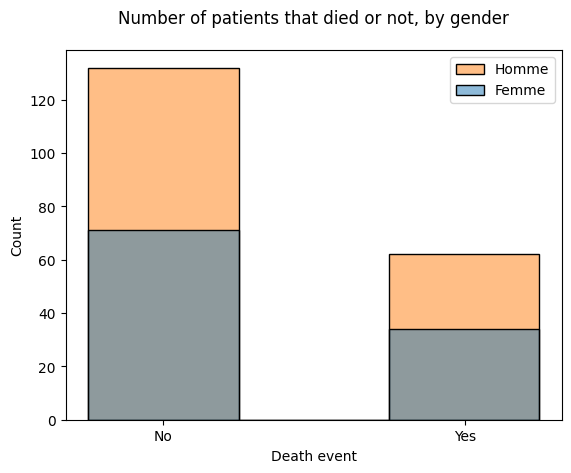

In [ ]:
# Showing the number of death events for patients with sex as a hue
import seaborn as sns
sns.histplot(data = df, x = 'death_event', hue = 'sex', bins=3)
plt.xlabel(xlabel='Death event')
plt.xticks([0.165, 0.835], ['No', 'Yes']) # Adjusting the x-tick for better readability
plt.legend(['Homme','Femme'])
plt.title('Number of patients that died or not, by gender', y=1.05)
plt.show()

In [9]:
# Determining which columns contains more than two outliers and how many there are per column
high_outlier = {}
for col in df.columns:
    nb_outlier = 0
    outer = True # Initilizes the outer to True so that we enter the first if when we see an outlier
    
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1 # Calculates the interquartile range
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR) # If a value is above one of the bounds, it's an outlier
    
    for val in df[col].values:
        if (((val > upper_bound) or (val < lower_bound)) and (outer == True)): # Enter if there is an outlier
            nb_outlier+=1 #Increments the counter
            
            if(nb_outlier > 3):
                high_outlier[col] = 0 #Initializes the key of the dictionary entry
                outer = False #So that we don't re-enter the loop on the next outlier to avoid duplicates in our keys
        else:
            if((val > upper_bound) or (val < lower_bound)): #Counts the rest of the outliers in the column
                nb_outlier+=1
            else:
                if(nb_outlier > 0):
                    high_outlier[col] = nb_outlier #Attributes the value to the key, will leave only the highest count (for the last outlier)
           
print(high_outlier)

{'creatinine_phosphokinase': 29, 'ejection_fraction': 2, 'platelets': 21, 'serum_creatinine': 29, 'serum_sodium': 4}


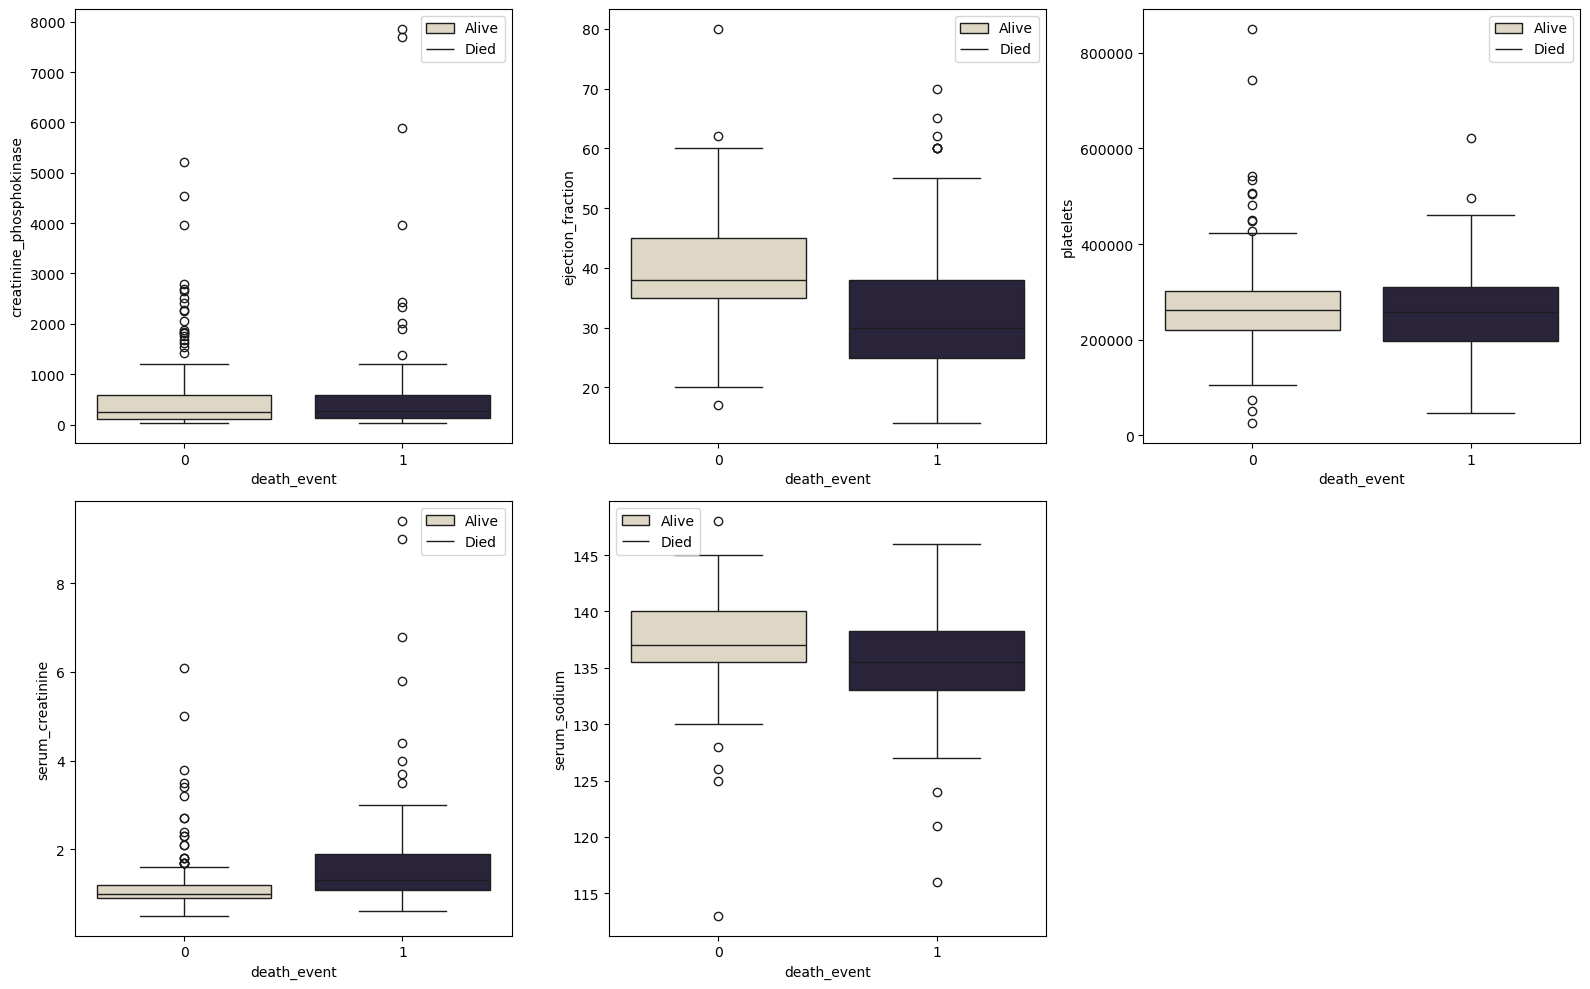

In [10]:
fig, ax = plt.subplots(2,3, figsize=(16,10))
for i, ( key, value) in enumerate(high_outlier.items()):
    if(i<3):
        sns.boxplot(data = df, x = 'death_event', y = key, ax = ax[0,i], hue = 'death_event', palette = "ch:s=-.2,r=.6")
        ax[0,i].legend(['Alive','Died'])
    else:
        sns.boxplot(data = df, x = 'death_event', y = key, ax = ax[1,i-3], hue = 'death_event', palette = "ch:s=-.2,r=.6")
        ax[1,i-3].legend(['Alive', 'Died'])

plt.delaxes(ax[1,2])
plt.tight_layout()
plt.show()

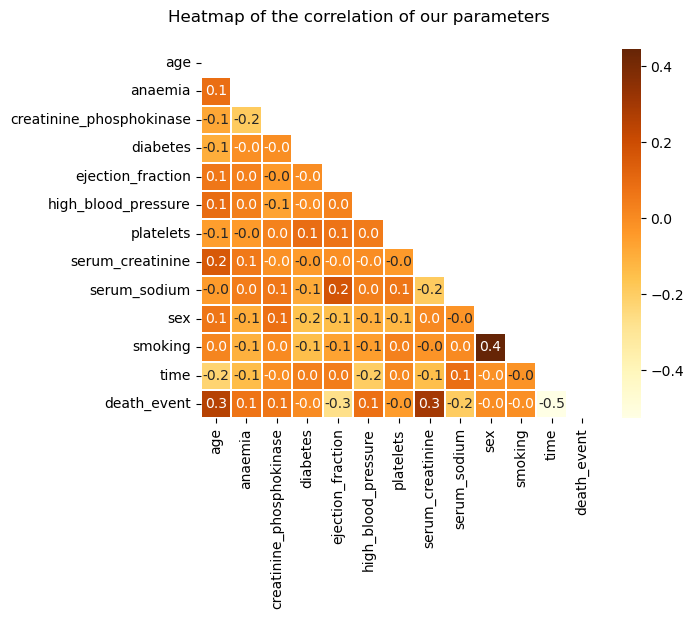

In [11]:
#Plotting the correlation matrix of our data
import seaborn as sns
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(data = corr_df, cmap='YlOrBr', mask=mask, annot=True, fmt='.1f', linewidths=0.3)
plt.title('Heatmap of the correlation of our parameters', x = 0.4, y=1.05)
plt.show()

In [12]:
# Initialising our model
knn = KNN()

# Initialising our scaler. We chose RobustScaler to deal with the outliers
scaler = RobustScaler()
scaler
knn

KNeighborsClassifier()

In [13]:
# Spliting the data
X = df.drop(columns = 'death_event')
#Normalizinig the values of X
X_scaled = scaler.fit_transform(X)
y = df.death_event
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)


## KNeighborsClassifier model


In [20]:
from sklearn.metrics import classification_report
# Training the model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Determining the accuracy of our model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"The accuracy for the simple KNeighborsClassifier is: {accuracy}")
print(f"Full report for the tuned KNeighborsClassifier model:\n {classification_report(y_test, y_pred_knn)}")

The accuracy for the simple KNeighborsClassifier is: 0.8111111111111111
Full report for the tuned KNeighborsClassifier model:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        64
           1       0.85      0.42      0.56        26

    accuracy                           0.81        90
   macro avg       0.83      0.70      0.72        90
weighted avg       0.82      0.81      0.79        90



In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, GridSearchCV
# Fine tuning the model

# Initializing our KFold to help with the RandomizedSearch
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Defining parameters for the RandomizedSearchCV to try
knn_params = {'n_neighbors':np.arange(1,10,1), 'leaf_size':np.arange(10, 50, 10)}

#Refining the model by finding the best performing parameters using RandomSearch
knn_cv = GridSearchCV(knn, knn_params, scoring = 'accuracy', cv=kf)
knn_cv.fit(X_train, y_train)

print(f'The best parameters for the model are {knn_cv.best_params_}\n')

#Setting the best model to a variable
best_knn = knn_cv.best_estimator_
#Predicting on our data
y_pred_best_knn = best_knn.predict(X_test) 
#Getting the full report for our model
report_best_knn = classification_report(y_test, y_pred_best_knn)
print("Full report for the tuned KNeighborsClassifier model:\n", report_best_knn)
accuracy_score(y_test, y_pred_knn)

The best parameters for the model are {'leaf_size': 10, 'n_neighbors': 9}

Full report for the tuned KNeighborsClassifier model:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        64
           1       0.85      0.42      0.56        26

    accuracy                           0.81        90
   macro avg       0.83      0.70      0.72        90
weighted avg       0.82      0.81      0.79        90



0.8111111111111111

## Decision tree classifier

In [24]:
clf = DecisionTreeClassifier(random_state = 1) #max_depth=5, min_samples_split=5, min_samples_leaf=3
clf

DecisionTreeClassifier(random_state=1)

In [25]:
# Testing our base model for reference
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'The accuracy score for the tree classifier is: {accuracy_tree}') # Model un peu meilleur que le knn

The accuracy score for the tree classifier is: 0.7888888888888889


In [26]:
from sklearn.model_selection import GridSearchCV
# Defining parameters for the RandomizedSearchCV to try
clf_params =  {'max_depth':np.arange(1,10,1), 'min_samples_leaf':np.arange(1,8,1), 'min_samples_split':np.arange(2,8,1)}

#Splitting the data to avoid errors
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

# Initializing our KFold to help with the RandomizedSearch
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Refining the model by finding the best performing parameters using RandomSearch
clf_cv = GridSearchCV(clf, clf_params, cv=kf, scoring='balanced_accuracy') #, random_state=1

clf_cv.fit(X_train, y_train)

print(f'The best parameters for the model are {clf_cv.best_params_}\n')

#Setting the best model to a variable
best_clf = clf_cv.best_estimator_
#Predicting on our data
y_pred_clf = best_clf.predict(X_test) 
#Getting the full report for our model
report_best_clf = classification_report(y_test, y_pred_clf)
print("Full report for the tuned DecisionTreeClassifier model:\n", report_best_clf)
accuracy_score(y_test, y_pred_clf)

The best parameters for the model are {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Full report for the tuned DecisionTreeClassifier model:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88        64
           1       0.68      0.81      0.74        26

    accuracy                           0.83        90
   macro avg       0.80      0.83      0.81        90
weighted avg       0.85      0.83      0.84        90



0.8333333333333334

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


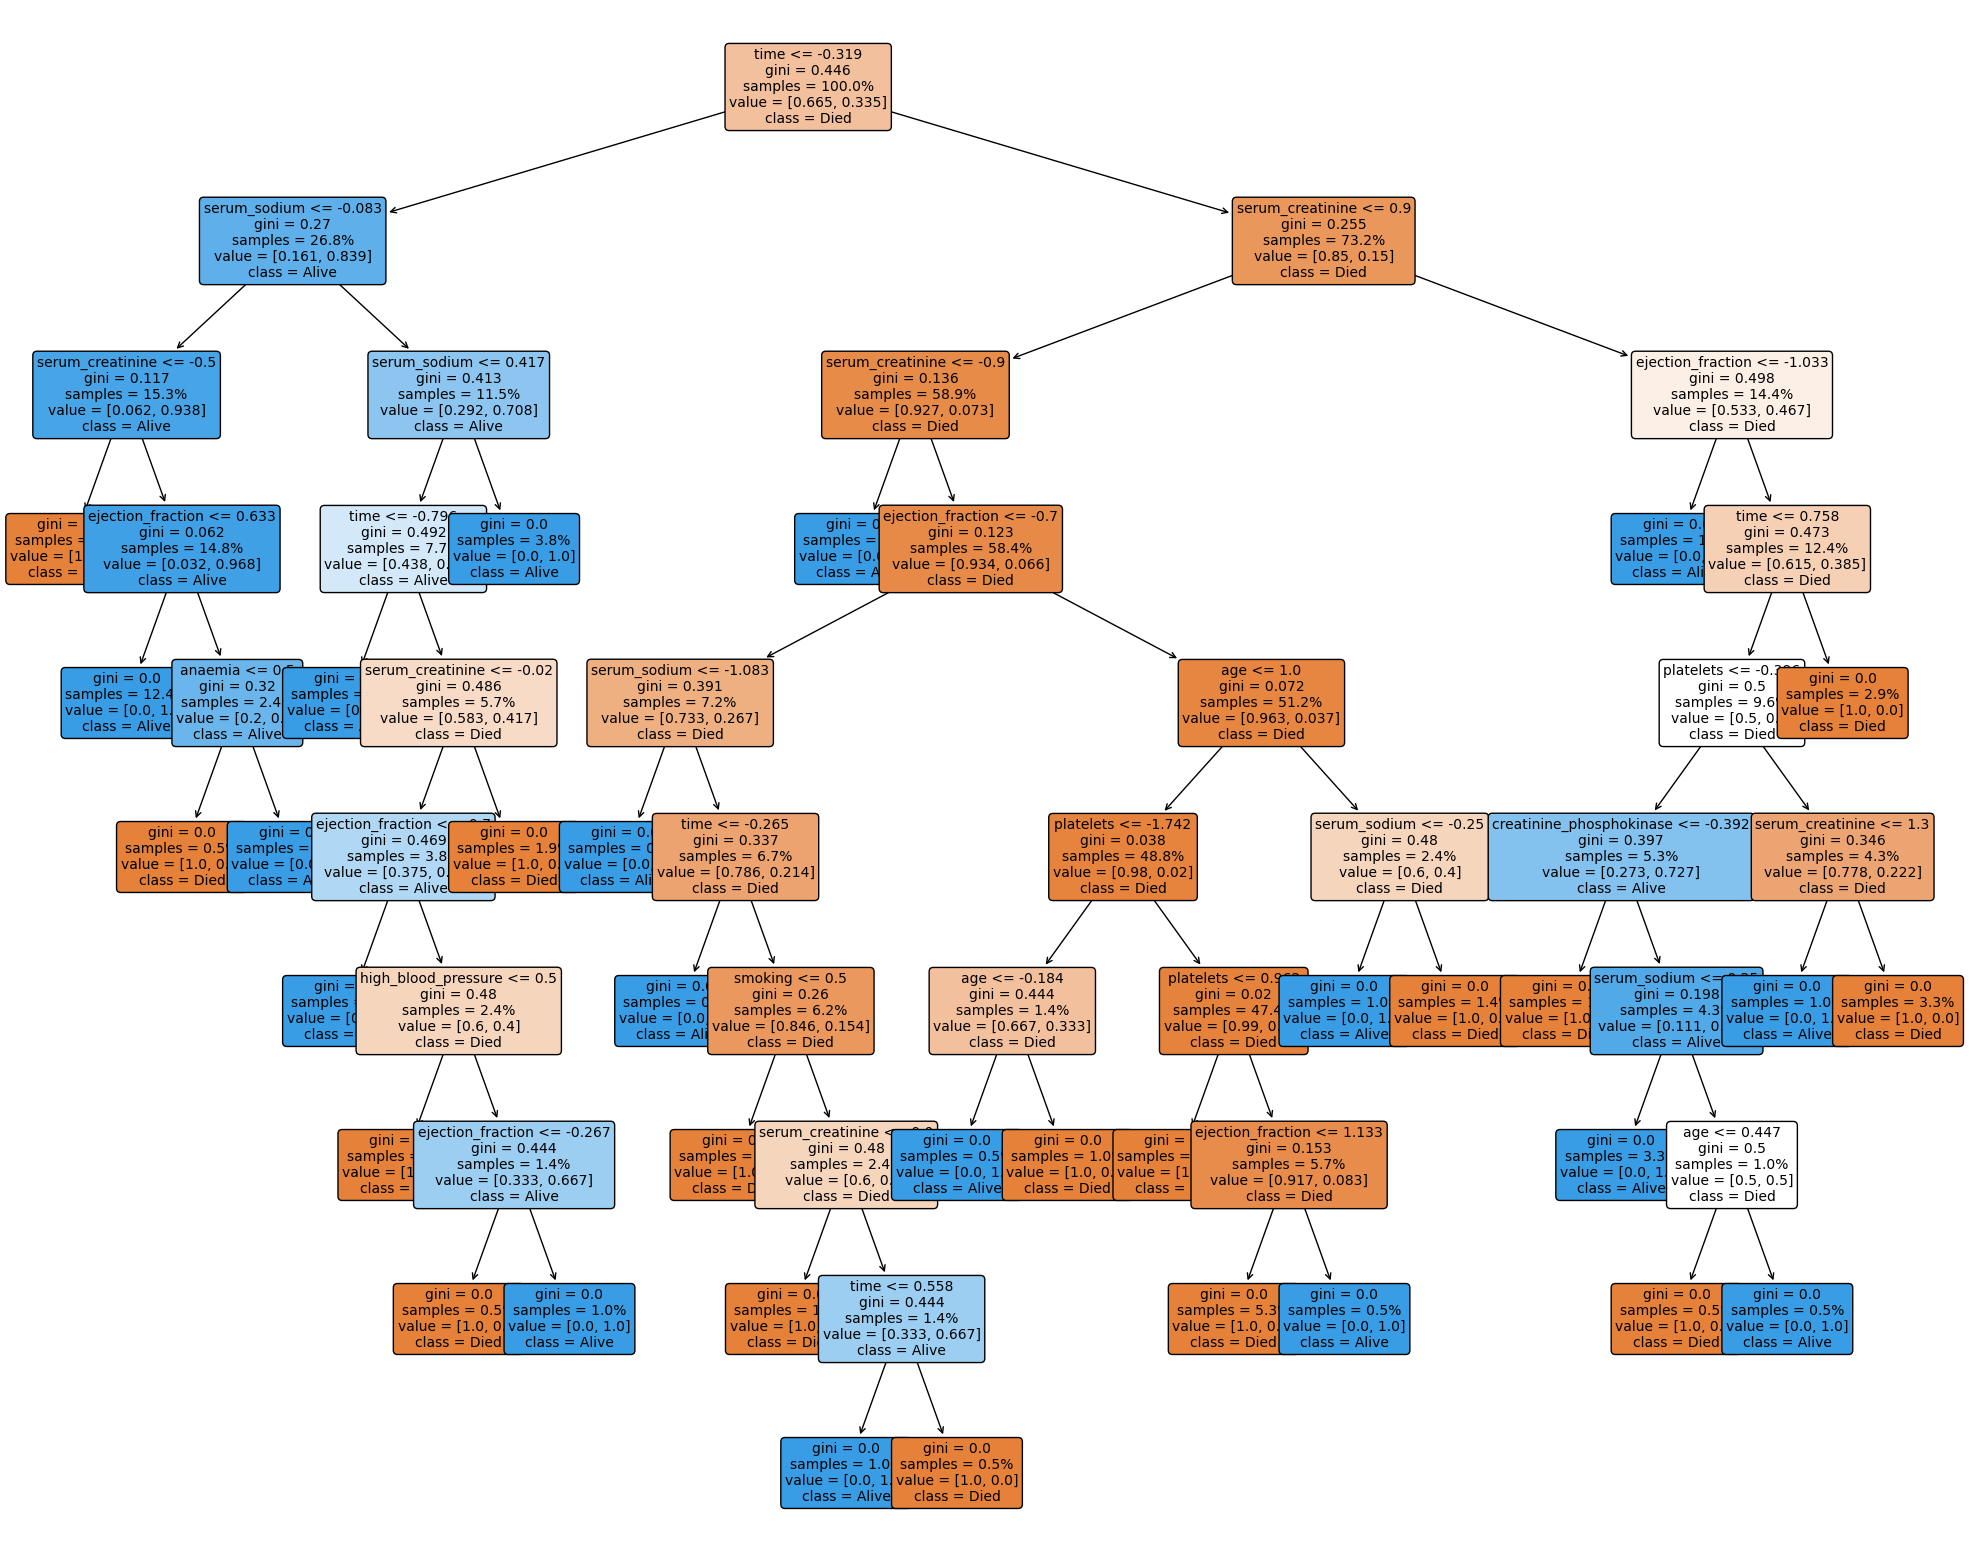

In [56]:
# Drawing our best model to help visualize it
from sklearn import tree
feature_names = df.columns.to_list()
feature_names.remove('death_event')
class_names = ['Died', 'Alive']
print(feature_names)
fig, ax = plt.subplots(figsize = (25,20))
tree.plot_tree(clf, 
               feature_names=feature_names,  # List of feature names
               class_names=class_names,      # List of class names
               filled=True, 
               rounded=True, fontsize = 10, proportion = True,
               ax=ax)
plt.show()

## Model IA

In [32]:
df_ia = df.sample(frac = 1, random_state = 42)
x = df_ia.drop(columns = 'death_event')
y = df_ia['death_event']

In [33]:
# Splitting the data
train_length = int(np.round(len(x)*0.80))
validation_length= train_length + int(np.round(len(x)*0.10))
print(train_length)
print(validation_length)

239
269


In [34]:
# Creating splits for our data
x_train=x.iloc[0:train_length] 
x_validation = x.iloc[train_length:validation_length]
x_test=x.iloc[validation_length:]
x_predict=x.iloc[validation_length:] 

y_train=y.iloc[0:train_length]
y_validation = y.iloc[train_length:validation_length] 
y_test=y.iloc[validation_length:]
y_predict=y.iloc[validation_length:]
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)
print(x_predict.shape)

(239, 12)
(30, 12)
(30, 12)
(30, 12)


In [35]:
# Standardizing the data
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)
x_predict = scaler.fit_transform(x_predict)

In [36]:
# importing libraries for AI generation
import tensorflow as tf
from tensorflow import keras
import sklearn

In [37]:
model= keras.models.Sequential()
model.add(keras.layers.Dense(600, activation="relu", input_shape=x_train.shape[1:]))#ajout d'une couche caché de 300 neurones et utilisant la fonction d'activation ReLu
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(300,activation="relu"));
model.add(keras.layers.Dense(300,activation="relu"));
model.add(keras.layers.Dense(1)); #death event or not
model.summary()

C:\Users\wasza\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 600)            │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,901 (2.44 MB)

 Trainable params: 639,901 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss="mean_squared_error", optimizer = 'adam', metrics=["accuracy"])
history=model.fit(x_train, y_train, epochs=80, validation_data=(x_validation,y_validation))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7106 - loss: 0.2324 - val_accuracy: 0.6333 - val_loss: 0.2434
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7822 - loss: 0.1470 - val_accuracy: 0.6333 - val_loss: 0.1949
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8013 - loss: 0.1251 - val_accuracy: 0.7333 - val_loss: 0.1816
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8163 - loss: 0.1175 - val_accuracy: 0.7000 - val_loss: 0.2092
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8908 - loss: 0.0843 - val_accuracy: 0.7667 - val_loss: 0.1817
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9148 - loss: 0.0601 - val_accuracy: 0.6667 - val_loss: 0.2126
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9591 - loss: 0.0428 - val_accuracy: 0.6333 - val_loss: 0.2169
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9715 - loss: 0.0327 - val_accuracy: 0.7000 - val_loss:

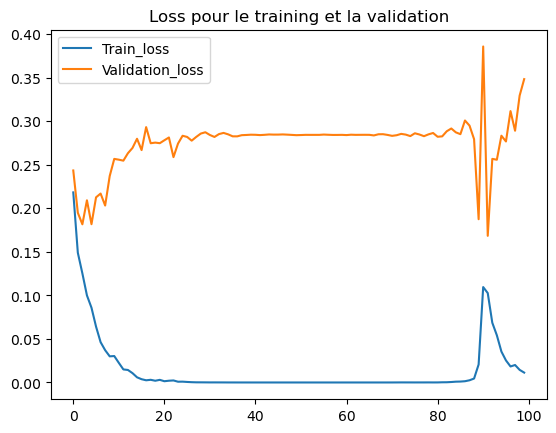

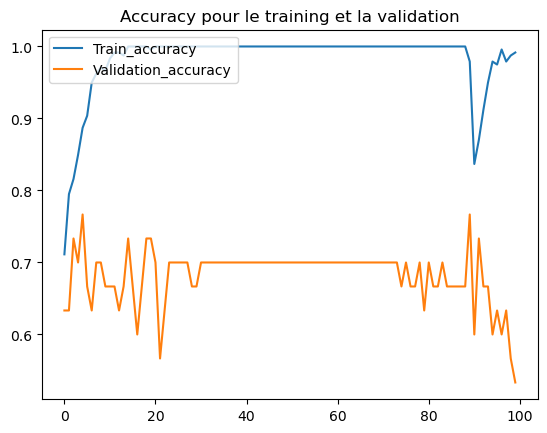

In [39]:
loss_curve=history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train_loss")
plt.plot(loss_val_curve, label = "Validation_loss")
plt.legend(loc='upper left')
plt.title("Loss pour le training et la validation")
plt.show()

plt.plot(acc_curve, label="Train_accuracy")
plt.plot(acc_val_curve, label="Validation_accuracy")
plt.legend(loc='upper left')
plt.title("Accuracy pour le training et la validation")
plt.show()